# ECE 313 Spring 2024: Lab 1
## Using Python for Signals and Systems
## Posted 01/24/2024, due 02/07/2024

Prof. Jon Tamir

TA: Asad Aali

Based on EE 120 course notes by Prof. Babak Ayazifar

v1 - Spring 2019: Dominic Carrano, Sukrit Arora, and Babak Ayazifar  
v2 - Fall 2019: Dominic Carrano

# Submitting The Notebooks

In terms of what we expect from you to do in completing the labs: every place you're required to answer a question, whether it be in the form of writing code or interpreting plots/results that you generate, it will be marked with "TODO".

When done, go to the notebook menu (under the jupyter logo) and click `File -> Download as -> PDF via LaTeX (.pdf)`. This is what you'll submit to Gradescope. If this gives you an error message, you can instead try `File -> Print Preview` and download that for submission.

### Other iPython Notebook navigation tips
- To add a new cell, either select `"Insert->Insert New Cell Below"` or click the white plus button
- You can change the cell mode from code to text in the pulldown menu. I use `Markdown` for text
- You can change the texts in the `Markdown` cells by double-clicking them.
- `Help->Keyboard Shortcuts` has a list of keyboard shortcuts

# Part 1: Overview of Jupyter notebooks

### Libraries

These are the libraries that we will be using in this class:
    
__Numpy__

NumPy is the fundamental package for scientific computing with Python.

__Scipy__

The SciPy library is a collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization, statistics and much more.

__matplotlib__

matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

#### About Each

numpy and matplotlib are both very systematic, in the sense that you're usually not calling one-off functions from them, but rather using them throughout your code, almost like a sort of sub-programming language inside Python. By the end of this semester, you'll be fairly well-seasoned in both. Scipy, on the other hand, is more of a collection of various useful functions that you'll look up when you need to do something really specific that numpy doesn't have, like digital filter design or some more complicated algorithms like k-means clustering.

### Functions

Functions take in a set of arguments, and return (possibly multiple) values. Here's an example of a function that checks if a number is divisible by 3, using Python's modulus operator (`a % b` returns the remainder of dividing `a` by `b`; if the remainder is 0, then `a` is divisible by `b`):

In [395]:
def is_divisible_by_3(x):
    return x % 3 == 0

print("6 is divisible by 3? {0}".format(is_divisible_by_3(6)))
print("8 is divisible by 3? {0}".format(is_divisible_by_3(8)))

6 is divisible by 3? True
8 is divisible by 3? False


You can also return multiple values from a function at once; just separate them with commas in the return statement. Similarly, to assign them to values after the function call, just separate the variables you want to assign the return values to by commas. Here's a dummy example that takes in two numbers, and returns their sum and their difference:

In [396]:
def sum_and_diff(x, y):
    return x+y, x-y

a, b = sum_and_diff(3, 5)
print(a) # 3 + 5 = 8
print(b) # 3 - 5 = -2 

8
-2


### Numpy Array

The numpy array, aka an "ndarray", is like a list with multidimensional support and more functions. This will be the primary data structure in our class.

Arithmetic operations on NumPy arrays correspond to elementwise operations. 

Important NumPy Array functions:

- `.shape` returns the dimensions of the array.

- `.ndim` returns the number of dimensions. 

- `.size` returns the number of entries in the array.

- `len()` returns the first dimension.


To use functions in NumPy, we have to import NumPy to our workspace. This is done by the command `import numpy`. By convention, we rename `numpy` as `np` for convenience.

### Creating a Numpy Array

In [397]:
import numpy as np

In [398]:
x = np.array([[1, 2], [3 , 4]])
print(x)

[[1 2]
 [3 4]]


### Getting the shape of a Numpy Array

In [399]:
x.shape # returns the dimensions of the numpy array

(2, 2)

In [400]:
np.shape(x) # equivalent to x.shape

(2, 2)

### Elementwise operations

One major advantage of using numpy arrays is that arithmetic operations on numpy arrays correspond to elementwise operations. This makes numpy amenable to vectorized implementations of algorithms, a common technique used for speeding up computer simulations than can be parallelized.

In [401]:
print(x)
print()
print(x + 2) # numpy is smart and assumes you want this to be done to all elements!

[[1 2]
 [3 4]]

[[3 4]
 [5 6]]


### Matrix multiplication

You can use `np.matrix` with the multiplication operator or `np.dot` to do matrix multiplication.

In [402]:
print(np.matrix(x) * np.matrix(x))
print() # newline for formatting

# Or
print(np.dot(x,x))

[[ 7 10]
 [15 22]]

[[ 7 10]
 [15 22]]


### Slicing numpy arrays

Numpy uses pass-by-reference semantics so it creates views into the existing array, without implicit copying. This is particularly helpful with very large arrays because copying can be slow.

In [403]:
x = np.array([1,2,3,4,5,6])
print(x)

[1 2 3 4 5 6]


We slice an array from a to b-1 with `[a:b]`.

In [404]:
y = x[0:4]
print(y)

[1 2 3 4]


Because slicing does not copy the array, changing `y` changes `x`.

In [405]:
y[0] = 7
print(x)
print(y)

[7 2 3 4 5 6]
[7 2 3 4]


To actually copy x, we should use `.copy()`. 

In [406]:
x = np.array([1,2,3,4,5,6])
y = x.copy()
y[0] = 7
print(x)
print(y)

[1 2 3 4 5 6]
[7 2 3 4 5 6]


### Useful Numpy function: arange

We use `arange` to create integer sequences in numpy arrays. It's exactly like the normal range function in Python, except that it automatically returns the result as a numpy array, rather than the plain vanilla Python list.

`arange(0,N)` creates an array listing every integer from 0 to N-1.

`arange(0,N,m)` creates an array listing every `m` th integer from 0 to N-1 .

In [407]:
print(np.arange(-5,5)) # every integer from -5 ... 4

[-5 -4 -3 -2 -1  0  1  2  3  4]


In [408]:
print(np.arange(0,5,2)) # every other integer from 0 ... 4

[0 2 4]


## Plotting

In this class, we will use `matplotlib.pyplot` to plot signals and images. 

By convention, we import `matplotlib.pyplot` as `plt`.

**To display the plots inside the browser, we use the command `%matplotlib inline` - do not forget this line whenever you start a new notebook.** We'll always include it for you, but in case your plots aren't showing up in the notebook when you're playing around on your own, it's probably because you forgot this. If you don't include it, Python will default to displaying it in another window on your computer, which normally is fine, but here we need the plots in the notebook so they show up in your submission PDF.

In [409]:
import matplotlib.pyplot as plt # by convention, we import matplotlib.pyplot as plt

# plot in browser instead of opening new windows
%matplotlib inline

In [410]:
# Generate signals
x = np.arange(0, 1, 0.001)
y1 = np.exp(-x)                              # decaying exponential
y2 = np.sin(2 * np.pi * 10.0 * x)/4.0 + 0.5  # 10 Hz sine wave

### Plotting One Signal

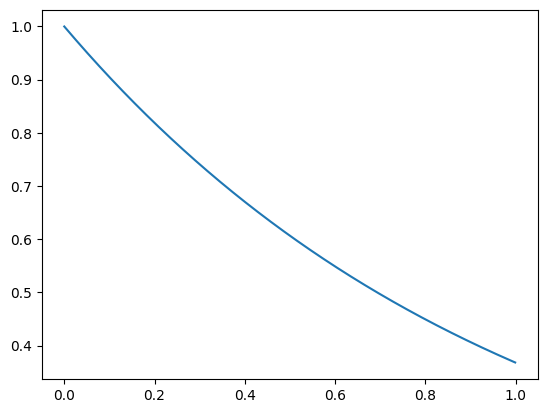

In [411]:
plt.figure()
plt.plot(x, y1)
plt.show()

### Plotting Multiple Signals in One Figure

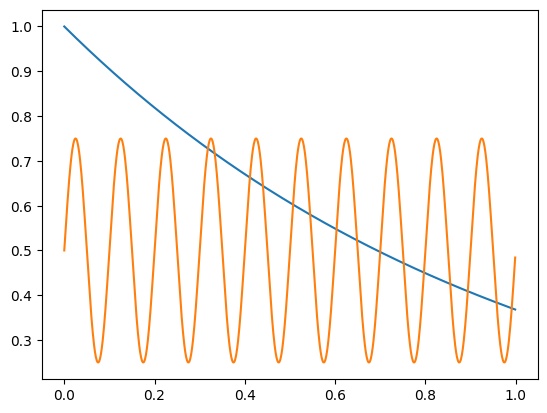

In [412]:
plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

### Plotting multiple signals in different figures

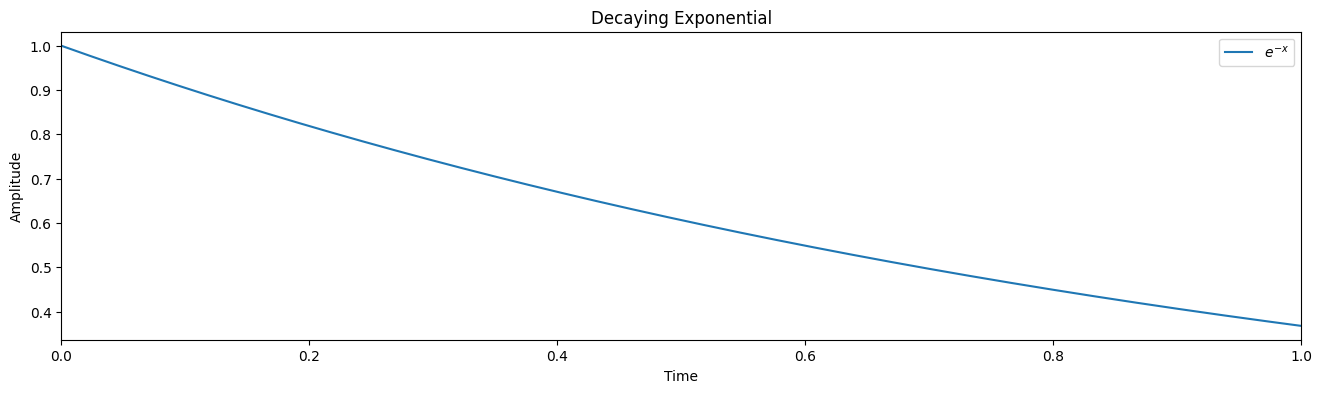

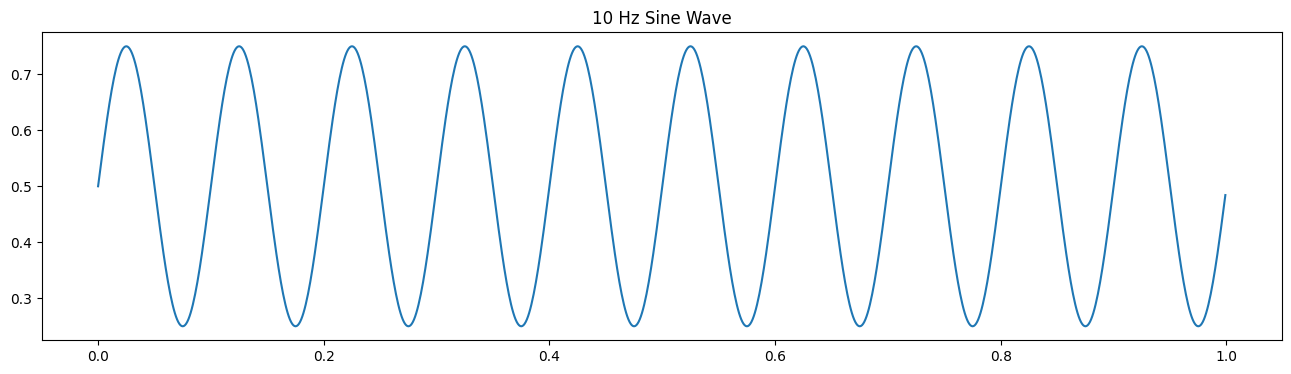

In [413]:
# figsize is the dimensions of the figure:
# - the first argument is the width
# - the second is height

# it's useful when you want to adjust the figure's dimensions, e.g. you 
# need a huge x-axis for data taken over a long time period
plt.figure(figsize=(16, 4))
plt.plot(x, y1)

# fancy formatting stuff - try playing with it!
plt.title("Decaying Exponential")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(["$e^{-x}$"])    # LaTeX fancy formatting
plt.xlim([0, 1])            # zoom in on x-axis 


# asking plt for a new figure before plotting will put the next call to plt.plot
# on that new figure
plt.figure(figsize=(16, 4)) 
plt.plot(x, y2)
plt.title("10 Hz Sine Wave")

# ALWAYS make sure to call plt.show() *ONCE* after all your plotting code so your plots are displayed!
# You only need to call it once per code cell, even if you have multiple figures.
plt.show()

**Make no mistake - the data points used for plotting on a computer truly always are discrete, but matplotlib's `plt.plot()` function interpolates them, giving us the continuous waveforms you see above.**

### You can also add a title and legend with `plt.title()`, `plt.legend()` to make your plots look professional!

#### Using dollar signs you can add math symbols (like Latex)!

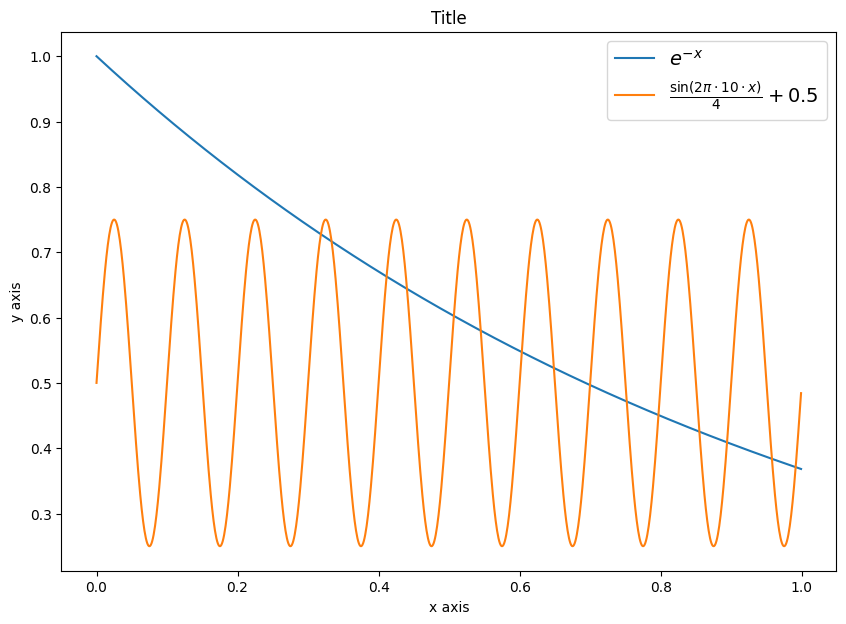

In [414]:
# The figsize parameter can help you shape your figure
plt.figure(figsize=(10,7))
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Title")

# You can also change the legend font size by passing in the fontsize= paramater
plt.legend((r'$e^{-x}$', r'$\frac{\sin(2\pi \cdot 10\cdot x)}{4}+0.5$'), fontsize=14)
plt.show()

You can also specify more options in `plot()`, such as color and linewidth. You can also change the axis using `plt.axis`

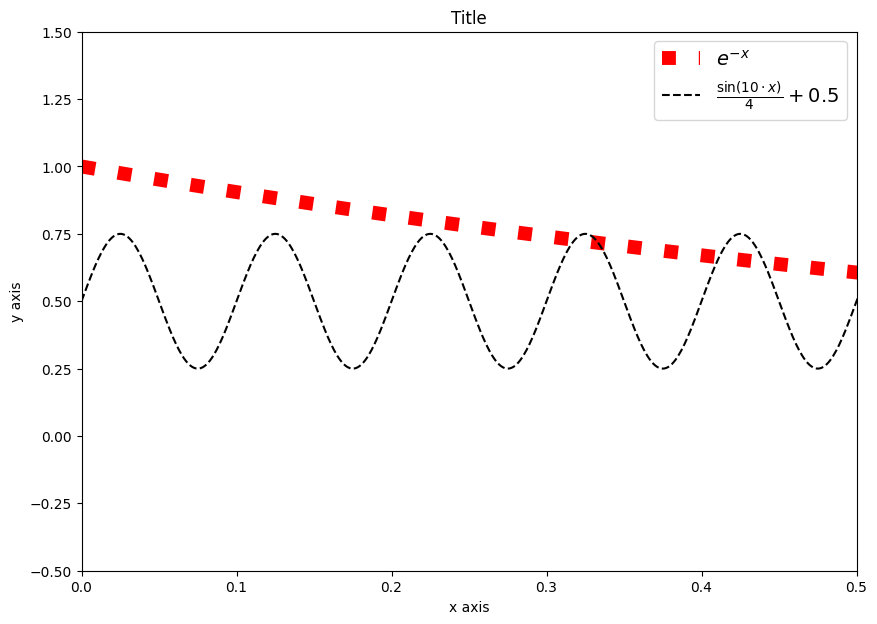

In [415]:
plt.figure(figsize=(10,7))
plt.plot(x, y1, ":r", linewidth=10)
plt.plot(x, y2, "--k")
plt.xlabel("x axis")
plt.ylabel("y axis")

plt.title("Title")

plt.legend((r'$e^{-x}$', r'$\frac{\sin(10\cdot x)}{4}+0.5$'), fontsize=14)

# plt.axis takes in a list of the form [x_lower, x_upper, y_lower, y_upper]
plt.axis([0, 0.5, -0.5, 1.5])
plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

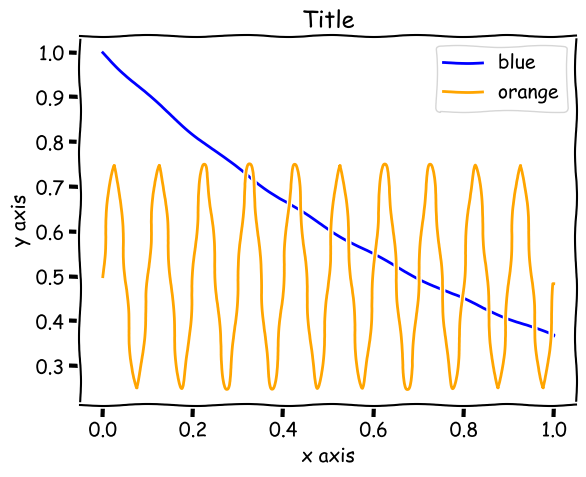

In [416]:
# xkcd: the Comic sans of plot styles
with plt.xkcd():
    plt.figure()
    plt.plot(x, y1, 'b')
    plt.plot(x, y2, color='orange')
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.title("Title")
    plt.legend(("blue", "orange"))
    plt.show()

### Other Plotting Functions

There are many other plotting functions. For example, we will use `plt.imshow()` for showing images.

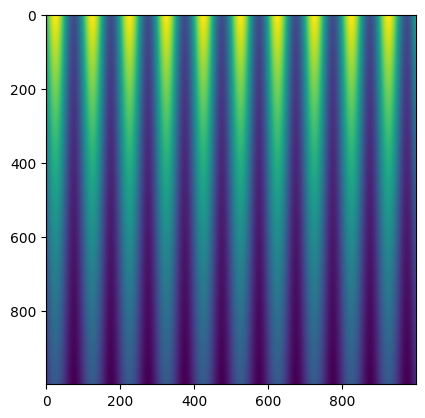

In [417]:
image = np.outer(y1, y2) # plotting the outer product of y1 and y2

plt.figure()
plt.imshow(image)
plt.show()

Similarly, we use `plt.stem()` for plotting discretized signals (technically, on a computer, everything is discretized, but it's often as a result of sampling something continuous, in which case it's often more informative to plot it as a continuous signal with `plt.plot()`).

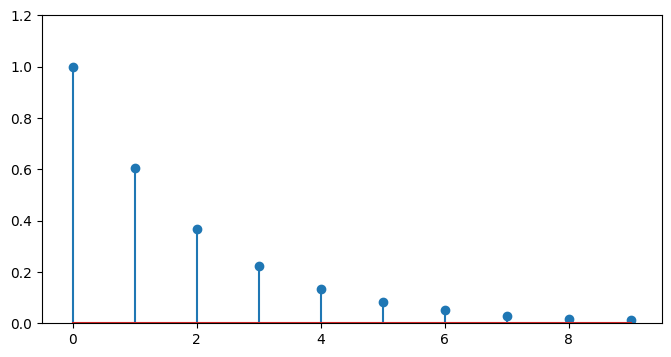

In [418]:
# decaying exponential
n = np.arange(0, 10)
signal = np.exp(-n / 2) 

# stem plot on an 8-by-4 inch figure
plt.figure(figsize=(8, 4))
plt.stem(n, signal)

# zoom out a little on both axes to get cleaner looking plot
plt.xlim([-.5, 9.5])
plt.ylim([0, 1.2])
plt.show()

# Part 2: Practice with Signals

Now that you're acquainted with the basics of Python and the iPython notebook environment, it's time to practice generating and plotting signals, since it's such a large part of what you'll be doing in the labs. 

In [419]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Signals on computers vs. pencil and paper

In ECE 313, we will consider two types of signals:
- Discrete Time (DT) signals, which are functions from the integers ($\{..., -2, -1, 0, 1, 2, ...\}$) to the real (or complex) numbers.
- Continuous Time (CT) signals, which are functions from the real numbers to the real (or complex) numbers.

From a mathematical point of view, considering signals as functions is incredibly useful. It enables us to do all sorts of operations on them that you're already familar with, such as multiplying them by each other or taking linear combinations of them. 

### Interpreting time indices

However, when working on a computer, there is a key limitation we must cope with: **finite memory**. We can't store a signal's value for every integer (in the DT case) or every real number (in the CT case). Instead, we represent signals as discrete arrays of some fixed length $N$. As a result, there are understood conventions in signals and systems for how to interpret the time indices associated with a signal's array representation:
- In DT, the first value is considered to be $n=0$, and the last to be $n=N-1$, for a total of $N$ values. Since the first value you have is the start of the signal, it makes to call it time "zero". This is convenient, as it's the same as the array indexing convention in (most) programming languages: the first value has index 0, and the last has index in a length $N$ array is $N-1$. Outside of these $N$ values, the signal is assumed to be implicitly zero. 
- In CT, signals are first *sampled* before they go onto a computer for processing, a method we'll discuss in more detail later in the semester. Again, the first sample is considered as time zero as in the DT case, but based on the *sampling rate*, we can assign a time in seconds to each sample. For example, digital audio is typically obtained by sampling acoustic pressure on a microphone (a CT signal) at 44.1 kHz, or 44100 times a second. This means that each sample is separated by 1/44100 seconds, so our samples correspond to $t=0$ seconds (the 1st sample), $t=1/44100$ seconds (the 2nd sample), $t=2/44100$ seconds (the 3rd sample), and so on, until $t=(N-1)/44100$ seconds when the last sample is taken for $N$ total samples. Again, outside of these $N$ samples, the signal is assumed to be zero.

In real world signal processing tasks, you're typically given information about where your signal came from, including whether or not it's truly DT or a sampled version of a CT signal, and if so, what the sampling rate was. In this lab, we'll only consider DT signals, with associated time indices given to you. Sometimes, you'll be asked to include some of the implicit zeros as you gain comfort with these conventions.

## Q2a: The Rectangular Signal

The length $L$ rectangular signal (sometimes also called the "rect" for short, or, alternatively, the "boxcar" signal) is defined as

$$r(n) = \begin{cases}1 & n = 0, 1, 2, ..., L - 1 \\ 0 & \text{otherwise}\end{cases}$$

Here's an example plot for $L = 7$, with time indices shown from -2 to 8 (so some implicit zeros are shown):

![](len7rect.png)

Some alternate definitions of the rect will normalize it (so that each nonzero point of the signal has height $1/L$), and some will center it around zero (although this can only be done when $L$ is odd, so that there is a center point and an equal number of nonzero signal points on each side of $n = 0$).

### Your Job

Fill in the cell below to *generate and plot* a **length 5** rectangular signal, with the time indices ranging from -2 to 8. 

Some quick refreshers from the content of Part 1:  
- We represent both signals and time indices as numpy arrays. For example, a length 3 rectangular signal can be constructed using the code `np.array([1, 1, 1])`, assuming you wanted to consider it for $n = 0, 1, 2$. 
- The function `np.arange` is extremely useful for generating sequences of numbers, as we often require when creating time indices for our data, as numpy arrays.
- When calling `plt.stem(x, y)`, the number of elements in `x` must equal the number of elements in `y`. To solve this, we can pad on some of the implicit zeros in our signal, as was done in the above plot, where the zeros for $n=-2,-1,7,8$ were included.

As in the plot above, label x and y axes with `plt.xlabel` and `plt.ylabel` (using $n$ and $r(n)$ respectively as was done above is fine; we just want you to get in the habit of labelling your plots). Additionally, use `plt.title` to title your plot as "Length 5 Rectangular Signal".

**Hint:** We use `plt.stem`, not `plt.plot`, for generating "lollipop" plots for discrete-time signals.

In [420]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

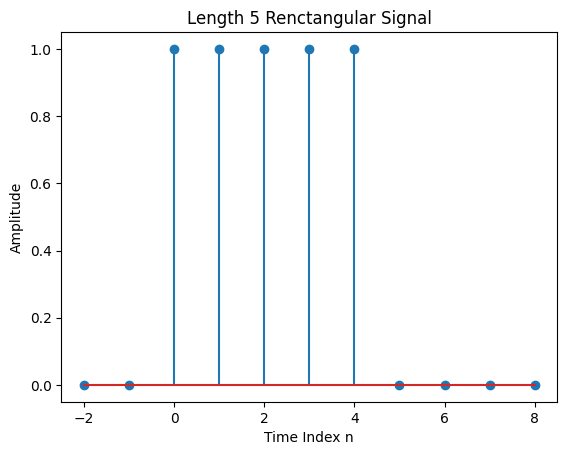

In [421]:
# TODO: Length 5 rectangular signal code + plot for n=-2 to 8
num = np.arange(-2,9)
rectangular_signal = np.where((num>=0) & (num< 5), 1,0)
plt.stem(num,rectangular_signal)
plt.title('Length 5 Renctangular Signal')
plt.xlabel('Time Index n')
plt.ylabel('Amplitude')
plt.show()

Now, fill in the cell below to *generate and plot* a **length 50** rectangular signal, with the **time indices ranging from 0 to 59**. Give your plot the title "Length 50 Rectangular Signal".

**Hint:** It's very tedious to type out 50 ones and 10 zeros. This is a great time to practice using the functions `np.concatenate`, `np.ones`, and `np.zeros`.

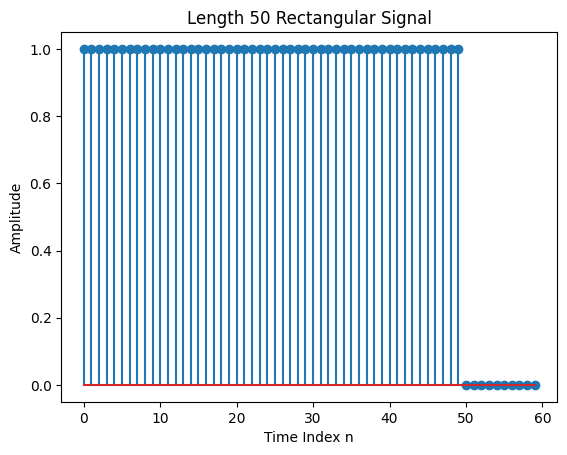

In [422]:
# TODO: Length 50 rectangular signal code + plot for n=0 to 59
num = np.arange(0,60)
rectangular_signal = np.where((num>=0) & (num<50),1,0)
plt.stem(num, rectangular_signal)
plt.title('Length 50 Rectangular Signal')
plt.xlabel('Time Index n')
plt.ylabel('Amplitude')
plt.show()

Now, fill in the cell below to *generate and plot* a **length 13** rectangular signal, with the **time indices ranging from 0 to 12**. Give your plot the title "Length 13 Rectangular Signal". Note that the indices 0 to 12 correspond to a total of 13 time points, so no padding of the implicit zeros is necessary.

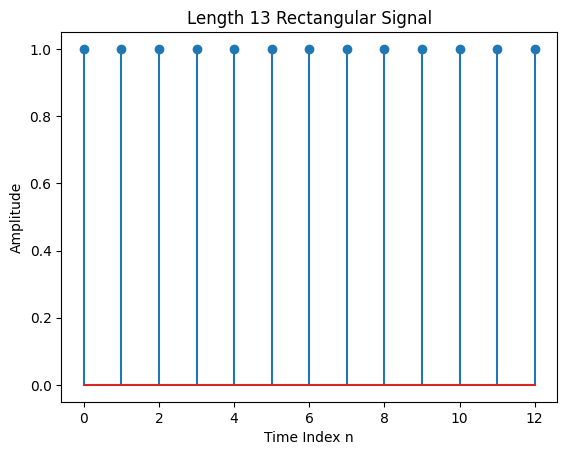

In [423]:
# TODO: Length 13 rectangular signal code + plot for n=0 to 12
num = np.arange(0,13)
rectangular_signal = np.where((num>=0) & (num<13),1,0)
plt.stem(num,rectangular_signal)
plt.title('Length 13 Rectangular Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time Index n')
plt.show()

Finally, fill in the cell below to *generate and plot* a **length 13** rectangular signal, with the **time indices ranging from -10 to 10**. This time, there's a twist: instead of using the definition above as we did in the previous part, make this signal zero-cenetered, so that the signal is nonzero from -6 to 6. Give your plot the title "Zero-Centered Length 13 Rectangular Signal".

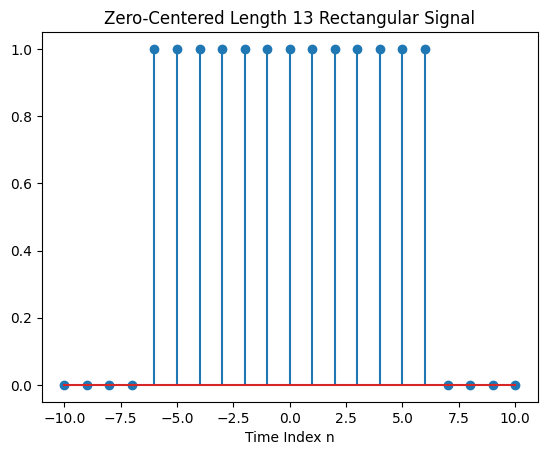

In [424]:
# TODO: Zero-centered length 13 rectangular signal code + plot for n=-10 to 10
num = np.arange(-10,11)
rectangular_signal = np.where((num >= -6)&(num <=6),1,0)
plt.stem(num,rectangular_signal)
plt.xlabel('Time Index n')
plt.title('Zero-Centered Length 13 Rectangular Signal')
plt.show()

## Q2b: The One-Sided Decaying Exponential Signal

We define the rate $r$, for all real numbers $r > 0$, one-sided decaying exponential signal as 

$$x(n) = e^{-rn} u(n) = \begin{cases}e^{-rn} & n = 0, 1, 2, ... \\ 0 & \text{otherwise}\end{cases}$$

Again, we've adopted the convention of starting our signal at $n=0$. Specifically, this one-sided decaying exponential is said to be *right-sided* since it decays as we go to the right (in fact, since the first nonzero point is at $n=0$, we call the signal *causal*). 

Here's a plot of the signal for a few different values of $r$, displayed for $n=-5$ to $n=20$:

![](decayingexpos.png)

As we increase $r$, the signal decays to zero faster and faster. In the case of $r = 0$, we obtain the unit step, which doesn't decay at all.

### Coping with infinite duration signals: Truncation

Note that for all $r > 0$, the signal has infinite duration, unlike our rectangular signal: we can pick an arbitrary $n > 0$, and $x(n)$ will be nonzero (in fact, it will be positive, since the exponential function is always positive).  

This creates an issue for us, since we can't store an infinite number of signal values. Fortunately, there's an easy and well-justified solution: *truncation*. Just as calling the "int" function causes Python to cast floating-point numbers to integers by chopping off, or *truncating*, the decimal part of the number (e.g. `int(3.1415) = 3`, so that `.1415` is removed), we can ignore all the signal values past some point by not including them. For example, in the above plots, we truncate the signals at $n=20$, so there are only 21 nonzero points in the output. The reason this is well-justified is that for most rates that aren't too small, exponentials decay very rapidly. In the first two plots above, for $n=20$, the signal value appears to have already decayed to zero anyways! For the third, we'd simply need to use more data points (likely around 50-100) if we wanted to capture all signal values above ~.001 or so.

### Your Job

Rather than recreate the same code for generating our signal several times as we did in Q2a, let's create a function for generating our one-sided decaying exponential signal. Then, we can just call the function each time we want to generate the signal! Fill in the `decaying_expo` function below, and run the cell below it to make sure you wrote it correctly.

Your function should return two separate things, in this order:   
1) The time indices.  
2) The signal values.   

If you're unsure of how to return multiple values from a Python function, you should go back to part 1.

**Hint 1:** The function `np.exp` will be of use, as `np.exp(x)` computes $e^x$ for any number $x$. Recall from Part 1 that numpy has been designed around *vectorization*: you can call `np.exp` (or, more generally, any numpy function that acts on numbers) on a numpy array and it will apply it element-wise! For example, `np.exp(np.array([1, .5, .25]))` would return a numpy array whose entries are $e^1, e^{.5}, e^{.25}$.

**Hint 2:** Your function needs to handle two separate cases: `n_start >= 0`, and `n_start < 0`. We recommend you define two variables: one for your time indices, and one for your signal. Then, based on `n_start`, assign them the appropriate values.

In [425]:
def decaying_expo(rate, n_start, n_end):
    """
    Returns a right-sided decaying exponential signal, truncated to the provided indices.
    
    Parameters:
    rate    - The decay rate.
    n_start - The first time index to use in generating the signal. 
    n_end   - The last time index to use in generating the signal.
    
    Returns:
    n       - The time indices the signal is generated for: n_start, n_start + 1, ..., n_end.
    sig     - The signal values for each input in n.
    
    If n_start is not less than n_end, a ValueError will be raised, as this specifies an empty
    range of time indices to generate the signal over.    
    """
    if n_start >= n_end:
        raise ValueError("n_start must be less than n_end")
    
    # TODO: YOUR CODE HERE
    num = np.arange(n_start, n_end + 1)
    sigma = np.exp(-rate*num) * (num>=0)
    return num, sigma

In [426]:
def run_tests():
    num_passed = 0
    
    ### Index tests, non-negative n_start ###
    test1_yours, _ = decaying_expo(.95, 0, 20)
    test1_staff = np.arange(0, 21)
    test1_passed = np.allclose(test1_yours, test1_staff)
    
    test2_yours, _ = decaying_expo(.8, 3, 20)
    test2_staff = np.arange(3, 21)
    test2_passed = np.allclose(test2_yours, test2_staff)
    
    print("Testing indices are correct when n_start >= 0")
    print("Test 1 Passed: {}".format(test1_passed))
    print("Test 2 Passed: {}".format(test2_passed))
    
    ### Signal tests, non-negative n_start ###
    _, test3_yours = decaying_expo(.95, 0, 20)
    test3_staff = np.array([1.0,0.38674102345450123,0.14956861922263506,0.057844320874838484,0.0223707718561656,0.008651695203120634,0.003345965457471275,0.001294022105465849,0.0005004514334406108,0.00019354509955809418,7.48518298877006e-05,2.894827329821157e-05,1.119548484259096e-05,4.329753266092978e-06,1.674493209434269e-06,6.475952175842209e-07,2.504516372327622e-07,9.685992250925397e-08,3.7459705562952584e-08,1.4487204867720514e-08,5.602796437537268e-09])
    test3_passed = np.allclose(test3_staff, test3_yours)
    
    _, test4_yours = decaying_expo(.8, 0, 20)
    test4_staff = np.array([1.0,0.44932896411722156,0.20189651799465538,0.09071795328941247,0.04076220397836621,0.01831563888873418,0.008229747049020023,0.003697863716482929,0.001661557273173934,0.0007465858083766792,0.00033546262790251185,0.0001507330750954765,6.772873649085378e-05,3.0432483008403625e-05,1.3674196065680938e-05,6.14421235332821e-06,2.7607725720371986e-06,1.2404950799567113e-06,5.573903692694596e-07,2.504516372327617e-07,1.1253517471925912e-07])
    test4_passed = np.allclose(test4_staff, test4_yours)
    
    _, test5_yours = decaying_expo(.3, 0, 20)
    test5_staff = np.array([1.0,0.7408182206817179,0.5488116360940265,0.40656965974059917,0.30119421191220214,0.22313016014842982,0.16529888822158656,0.1224564282529819,0.09071795328941251,0.06720551273974978,0.049787068367863944,0.036883167401240015,0.02732372244729257,0.02024191144580439,0.014995576820477703,0.011108996538242306,0.00822974704902003,0.006096746565515638,0.00451658094261267,0.003345965457471272,0.0024787521766663585]) 
    test5_passed = np.allclose(test4_staff, test4_yours)
    
    print("\nTesting signal values are correct when n_start >= 0")
    print("Test 3 Passed: {}".format(test3_passed))
    print("Test 4 Passed: {}".format(test4_passed))
    print("Test 5 Passed: {}".format(test5_passed))
    
    ### Index tests, negative n_start ###
    test6_yours, _ = decaying_expo(5, -4, 217)
    test6_staff = np.arange(-4, 218)
    test6_passed = np.allclose(test6_yours, test6_staff)
    
    test7_yours, _ = decaying_expo(np.pi, -1998, 2019)
    test7_staff = np.arange(-1998, 2020)
    test7_passed = np.allclose(test7_yours, test7_staff)
    
    print("\nTesting indices are correct when n_start < 0")
    print("Test 6 Passed: {}".format(test6_passed))
    print("Test 7 Passed: {}".format(test7_passed))
    
    ### Signal tests, negative n_start ###
    _, test8_yours = decaying_expo(1, -4, 14)
    test8_staff = np.array([0.0,0.0,0.0,0.0,1.0,0.36787944117144233,0.1353352832366127,0.049787068367863944,0.01831563888873418,0.006737946999085467,0.0024787521766663585,0.0009118819655545162,0.00033546262790251185,0.00012340980408667956,4.5399929762484854e-05,1.670170079024566e-05,6.14421235332821e-06,2.2603294069810542e-06,8.315287191035679e-07])
    test8_passed = np.allclose(test8_staff, test8_yours)
    
    _, test9_yours = decaying_expo(.5, -5, 15)
    test9_staff = np.array([0.0,0.0,0.0,0.0,0.0,1.0,0.6065306597126334,0.36787944117144233,0.22313016014842982,0.1353352832366127,0.0820849986238988,0.049787068367863944,0.0301973834223185,0.01831563888873418,0.011108996538242306,0.006737946999085467,0.004086771438464067,0.0024787521766663585,0.0015034391929775724,0.0009118819655545162,0.0005530843701478336])
    test9_passed = np.allclose(test9_staff, test9_yours)
    
    _, test10_yours = decaying_expo(4, -6, 16)
    test10_staff = np.array([0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.01831563888873418,0.00033546262790251185,6.14421235332821e-06,1.1253517471925912e-07,2.061153622438558e-09,3.775134544279098e-11,6.914400106940203e-13,1.2664165549094176e-14,2.3195228302435696e-16,4.248354255291589e-18,7.781132241133797e-20,1.4251640827409352e-21,2.6102790696677047e-23,4.780892883885469e-25,8.75651076269652e-27,1.603810890548638e-28])
    test10_passed = np.allclose(test10_staff, test10_yours)
    
    print("\nTesting signal values are correct when n_start < 0")
    print("Test 8 Passed: {}".format(test8_passed))
    print("Test 9 Passed: {}".format(test9_passed))
    print("Test 10 Passed: {}".format(test10_passed))
    
    test_results = np.array([test1_passed, test2_passed, test3_passed, test4_passed, test5_passed, \
                            test6_passed, test7_passed, test8_passed, test9_passed, test10_passed])
    
    print("\n{0} out of {1} tests passed".format(sum(test_results), 10))

run_tests()

Testing indices are correct when n_start >= 0
Test 1 Passed: True
Test 2 Passed: True

Testing signal values are correct when n_start >= 0
Test 3 Passed: True
Test 4 Passed: True
Test 5 Passed: True

Testing indices are correct when n_start < 0
Test 6 Passed: True
Test 7 Passed: True

Testing signal values are correct when n_start < 0
Test 8 Passed: True
Test 9 Passed: True
Test 10 Passed: True

10 out of 10 tests passed


C:\Users\fahim\AppData\Local\Temp\ipykernel_111716\752284604.py:22: RuntimeWarning: overflow encountered in exp
  sigma = np.exp(-rate*num) * (num>=0)
C:\Users\fahim\AppData\Local\Temp\ipykernel_111716\752284604.py:22: RuntimeWarning: invalid value encountered in multiply
  sigma = np.exp(-rate*num) * (num>=0)


Once all tests are passing, fill in the cell below to recreate the plot that was given to you above for the right-sided decaying exponentials. 

Using your shiny new and tested function, this should be pretty simple; the only work is in generating the plots. If you're unsure of how to plot multiple signals below one another, head back to the **"Plotting multiple signals in different figures"** section of Part 1. Alternatively, if you're feeling fancy, this would be a great opportunity to try your hand at using matplotlib's [subplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplot.html) function to generate a 3x1 grid of plots within the same figure. Either plotting method is acceptable.

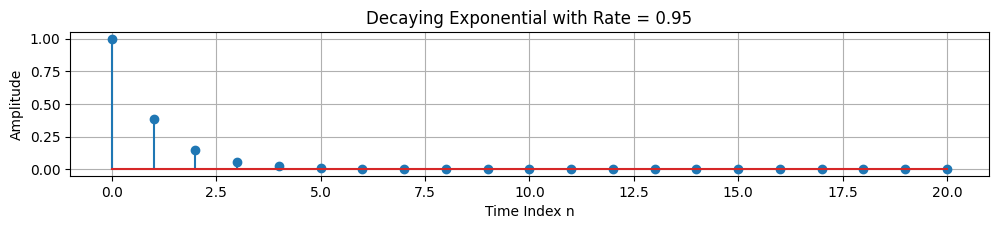

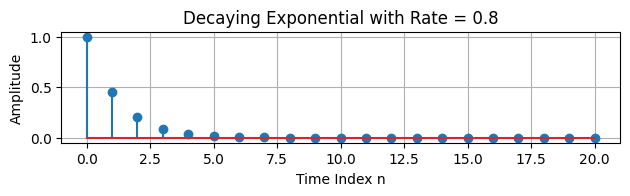

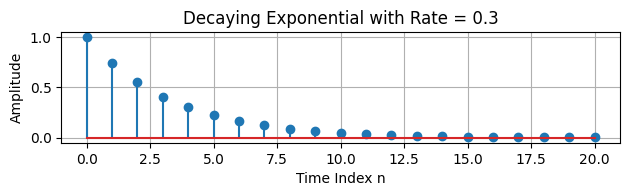

In [427]:
# TODO your signal/time index generation here
import numpy as np 
import matplotlib.pyplot as plt
rates = [0.95, 0.8, 0.3]
n_start = 0
n_end = 20

plt.figure(figsize=(10,6))

for i, rate in enumerate(rates):
    num, sig = decaying_expo(rate, n_start, n_end)
    plt.subplot(3,1, i + 1)
    plt.stem(num, sig)
    plt.xlabel('Time Index n')
    plt.ylabel('Amplitude')
    plt.title(f'Decaying Exponential with Rate = {rate}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

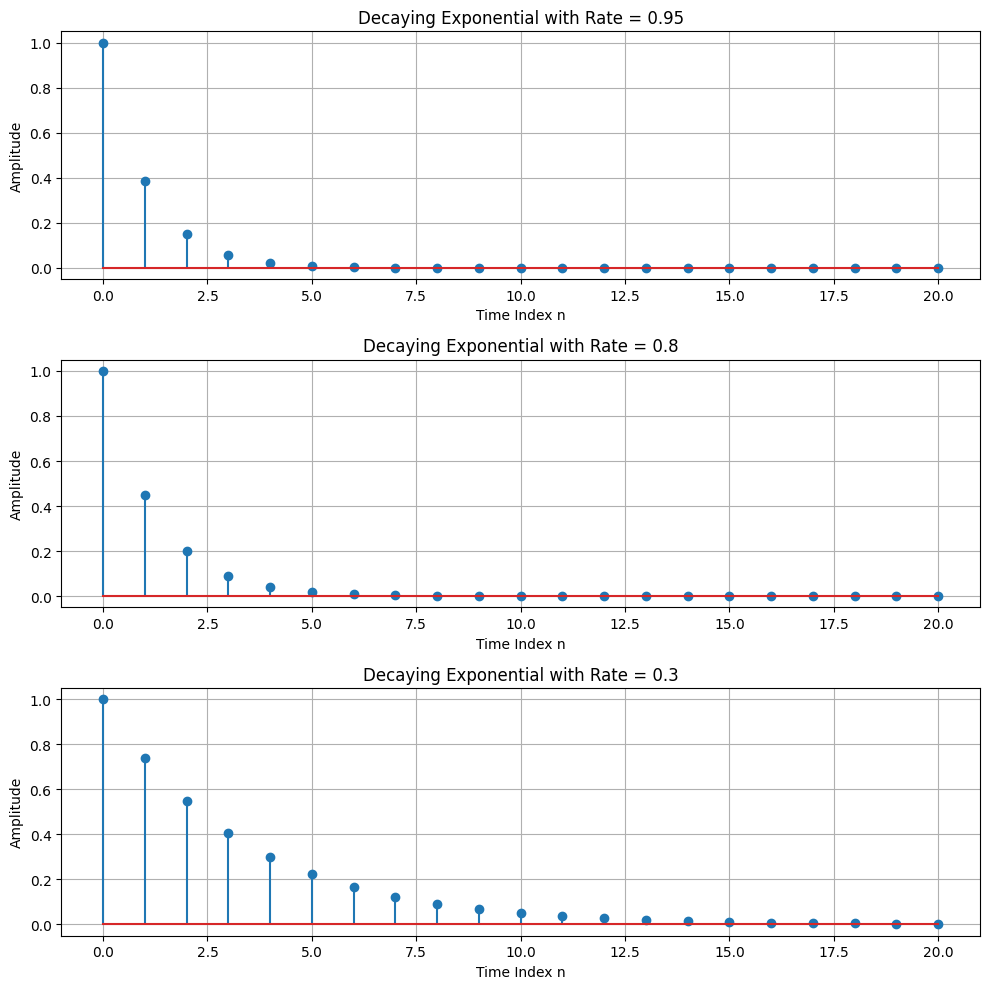

In [428]:
# TODO your plotting code here
import numpy as np 
import matplotlib.pyplot as plt

rates = [0.95, 0.8, 0.3]
n_start = 0
n_end = 20

plt.figure(figsize=(10,10))

for i, rate in enumerate(rates):
    num, sig = decaying_expo(rate, n_start, n_end)
    plt.subplot(3,1, i + 1)
    plt.stem(num, sig)
    plt.xlabel('Time Index n')
    plt.ylabel('Amplitude')
    plt.title(f'Decaying Exponential with Rate = {rate}')
    plt.grid(True)
    
plt.tight_layout()
plt.show()



You can do a quick sanity check on your results by comparing to the original plot above - the two should match exactly (don't forget the plot titles)!

# Q3: Sinusoids in Python

Recall that a sinusoid is defined as $x(t) = A\cos(\omega t + \theta)$. 
\
For each plot shown, calculate $A$, $\omega$, and $\theta$. 
If you cannot exactly determine the value on the plot, show how you arrived at that estimate.
Then, using Python, plot the sinusoid over two periods. Make sure to include labels for axes. 
\
(a) Figure 1
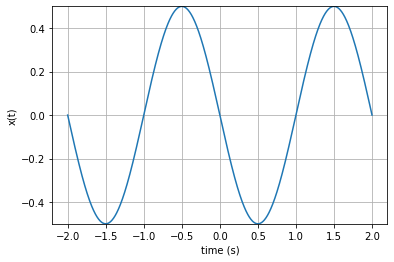
\
(c) Figure 3
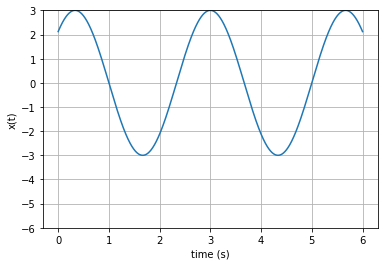
\
(b) Figure 2
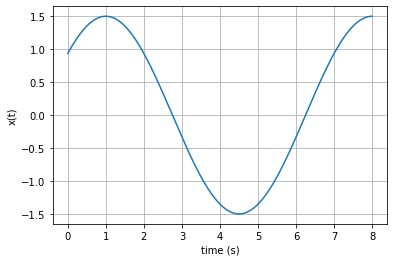

**(a) your answer here**

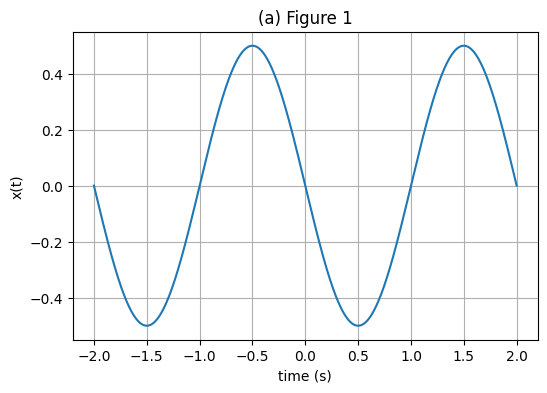

In [2]:
# (a) your code here
import matplotlib.pyplot as plt
import numpy as np

def plot_sinusoid(A, w, theta, time):
    return A * np.cos(w * time + theta)

parameters = {
    'A': 0.5,
    'w' : np.pi,
    'theta': 1.57,
    'time' : np.linspace(-2,2,1000)
}

y = plot_sinusoid(**parameters)

plt.figure(figsize = (6,4))
plt.plot(parameters['time'], y)

plt.title('(a) Figure 1')
plt.xlabel('time (s)')
plt.ylabel('x(t)')

plt.grid(True)

plt.show()

**(b) your answer here**

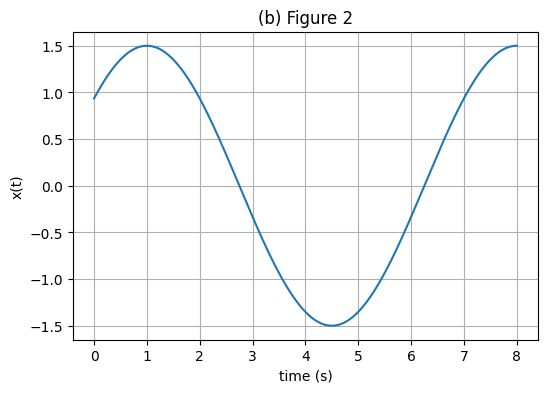

In [430]:
# (b) your code here
import numpy as np
import matplotlib.pyplot as plt

A= 1.5
T = 7
w = 2*np.pi/T
theta = w
t = np.linspace(0,8,1000)
x_t = A * np.cos(w*t - theta)
plt.figure(figsize = (6,4))
plt.xlabel('time (s)')
plt.ylabel('x(t)')
plt.plot(t,x_t, label = 'x(t)')
plt.title('(b) Figure 2')
plt.grid(True)
plt.show()

**(c) your answer here**

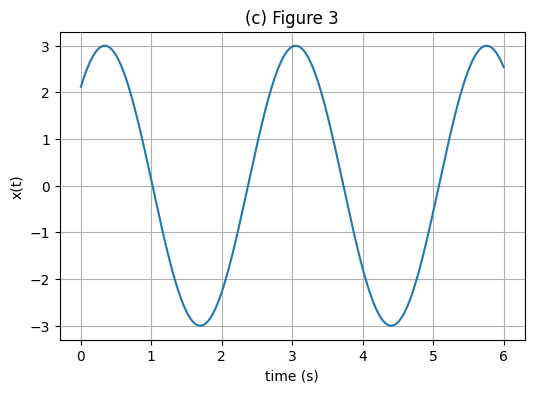

In [431]:
# (c) your code here
import numpy as np
import matplotlib.pyplot as plt

A= 3
T = 2.71
w = 2* np.pi/T
theta = -3.14/4

t = np.linspace(0,6,1000)
x_t = A*np.cos(w*t + theta)

plt.figure(figsize= (6,4))
plt.plot(t,x_t, label ='x(t)')
plt.ylabel('x(t)')
plt.title('(c) Figure 3')
plt.xlabel('time (s)')
plt.grid(True)
plt.show()

# References
[1] The official Python 3 language documentation. [Link](https://docs.python.org/3/).  
[2] The official numpy and scipy documentation. [Link](https://docs.scipy.org/doc/).  
[3] The official matplotlib documentation. [Link](https://matplotlib.org/contents.html)  